# Sexual harassment cases per country and year

### USA
2015--> 368,921

2017 --> 363,393

2020 --> 298,628

### Argentina
2015--> 12,637

2017--> 10,552

2020--> 20,950

### Spain
2015--> 6,823 

2017--> 8,018

2020--> 10,798




#### Lets create a dataframe with our data

In [1]:
import pandas as pd

data = {'Country': ['USA', 'USA', 'USA', 'Argentina', 'Argentina', 'Argentina', 'Spain', 'Spain', 'Spain'],
        'Year': [2015, 2017, 2020]*3,
        'Sexual_Harassment_Cases': [368921, 363393, 298628, 12637, 10552, 20950, 6823, 8018, 10798]}
sh = pd.DataFrame(data)
sh


,Country,Year,Sexual_Harassment_Cases
0,USA,2015,368921
1,USA,2017,363393
2,USA,2020,298628
3,Argentina,2015,12637
4,Argentina,2017,10552
5,Argentina,2020,20950
6,Spain,2015,6823
7,Spain,2017,8018
8,Spain,2020,10798


## Import our social classes classification data

In [2]:
usa=pd.read_csv('/Users/mac/Desktop/TFG/data/code/classes/usa.csv')
arg=pd.read_csv('/Users/mac/Desktop/TFG/data/code/classes/arg.csv')
spain=pd.read_csv('/Users/mac/Desktop/TFG/data/code/classes/spain.csv')

Merge datasets

In [3]:
df = pd.concat([usa, arg, spain], ignore_index=True)
df['Country'] = pd.Series(['USA']*3 + ['Argentina']*3 + ['Spain']*3)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,Country,Year,Lower_Class,Middle_Class,High_Class
0,USA,2015,1374,5443,62676
1,USA,2017,1141,59957,5654
2,USA,2020,1112,61526,1503
3,Argentina,2015,444,7915,10437
4,Argentina,2017,1504,1254,15719
5,Argentina,2020,272,8151,6019
6,Spain,2015,2628,8898,9938
7,Spain,2017,2621,8824,10035
8,Spain,2020,2093,7445,9130


In [4]:
df['Sexual_Harassment_Cases'] = data['Sexual_Harassment_Cases']
df

,Country,Year,Lower_Class,Middle_Class,High_Class,Sexual_Harassment_Cases
0,USA,2015,1374,5443,62676,368921
1,USA,2017,1141,59957,5654,363393
2,USA,2020,1112,61526,1503,298628
3,Argentina,2015,444,7915,10437,12637
4,Argentina,2017,1504,1254,15719,10552
5,Argentina,2020,272,8151,6019,20950
6,Spain,2015,2628,8898,9938,6823
7,Spain,2017,2621,8824,10035,8018
8,Spain,2020,2093,7445,9130,10798


## Check if we have a correlation between the social classes and the total number of sexual harassment cases

In [5]:
correlation_low_income = df["Lower_Class"].corr(df["Sexual_Harassment_Cases"])
correlation_middle_income = df["Middle_Class"].corr(df["Sexual_Harassment_Cases"])
correlation_high_income = df["High_Class"].corr(df["Sexual_Harassment_Cases"])
print("Correlation between Lower Class and Sexual Harassment Cases:", correlation_low_income)
print("Correlation between Middle Class and Sexual Harassment Cases:", correlation_middle_income)
print("Correlation between Higher Class and Sexual Harassment Cases:", correlation_high_income)

Correlation between Lower Class and Sexual Harassment Cases: -0.237929067005508
Correlation between Middle Class and Sexual Harassment Cases: 0.6868874309372904
Correlation between Higher Class and Sexual Harassment Cases: 0.4154665703201023


We will now standardize our variables since our samples for each country were of different sizes and this may have affected the correlation

In [6]:
#Copy to standardize
stan=df.copy()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Lower_Class', 'Middle_Class', 'High_Class', 'Sexual_Harassment_Cases']
stan[columns] = scaler.fit_transform(stan[columns])

In [8]:
correlation = stan.corr()
correlation

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_42303/3695328179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = stan.corr()


,Year,Lower_Class,Middle_Class,High_Class,Sexual_Harassment_Cases
Year,1.000000,-0.192660,0.313078,-0.496515,-0.052325
Lower_Class,-0.192660,1.000000,-0.210705,0.028205,-0.237929
Middle_Class,0.313078,-0.210705,1.000000,-0.368180,0.686887
High_Class,-0.496515,0.028205,-0.368180,1.000000,0.415467
Sexual_Harassment_Cases,-0.052325,-0.237929,0.686887,0.415467,1.000000


Our results are the same than prior the standardization, lets now have a look at a heatmap for the correlation among sexual harassment and social classes

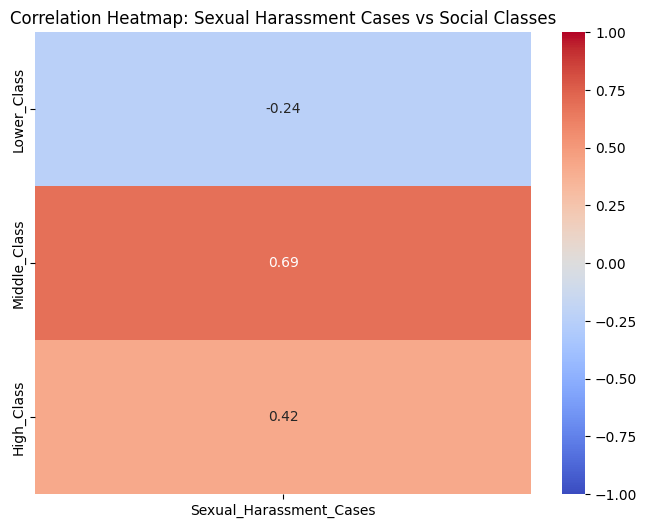

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
filtered_correlation = correlation.loc[
    ['Lower_Class', 'Middle_Class', 'High_Class'],
    ['Sexual_Harassment_Cases']
]
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Sexual Harassment Cases vs Social Classes')
plt.show()

Lets now have a look at the relationship between the different years studied and the number of sexual harassment cases

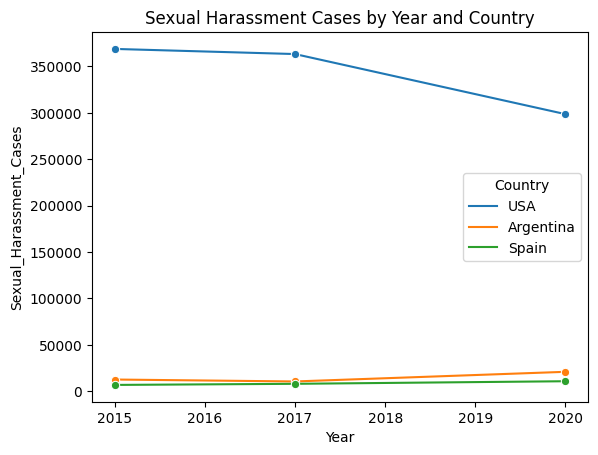

In [11]:
#Line plot
sns.lineplot(df, x='Year', y='Sexual_Harassment_Cases', hue='Country', marker='o')
plt.title('Sexual Harassment Cases by Year and Country')
plt.show()

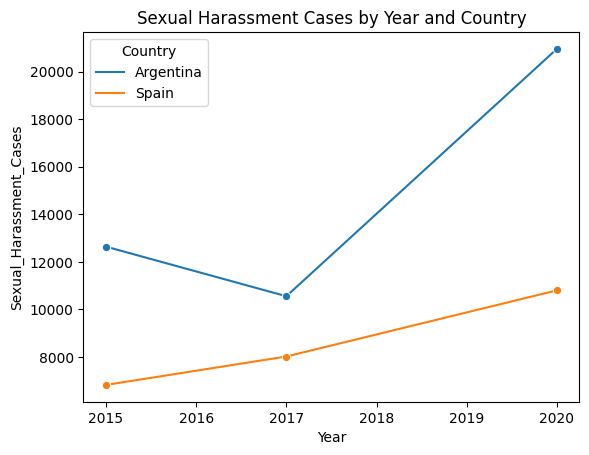

In [12]:
#Look only at Argentina and Spain
sns.lineplot(df[df['Country'] != 'USA'], x='Year', y='Sexual_Harassment_Cases', hue='Country', marker='o')
plt.title('Sexual Harassment Cases by Year and Country')
plt.show()

Lets make. abar chart to calculate the percentage of each social class by country to see the difference

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_42303/444901277.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Year', y='Percentage', hue='Social_Class', ci=None, dodge=True, palette='viridis')


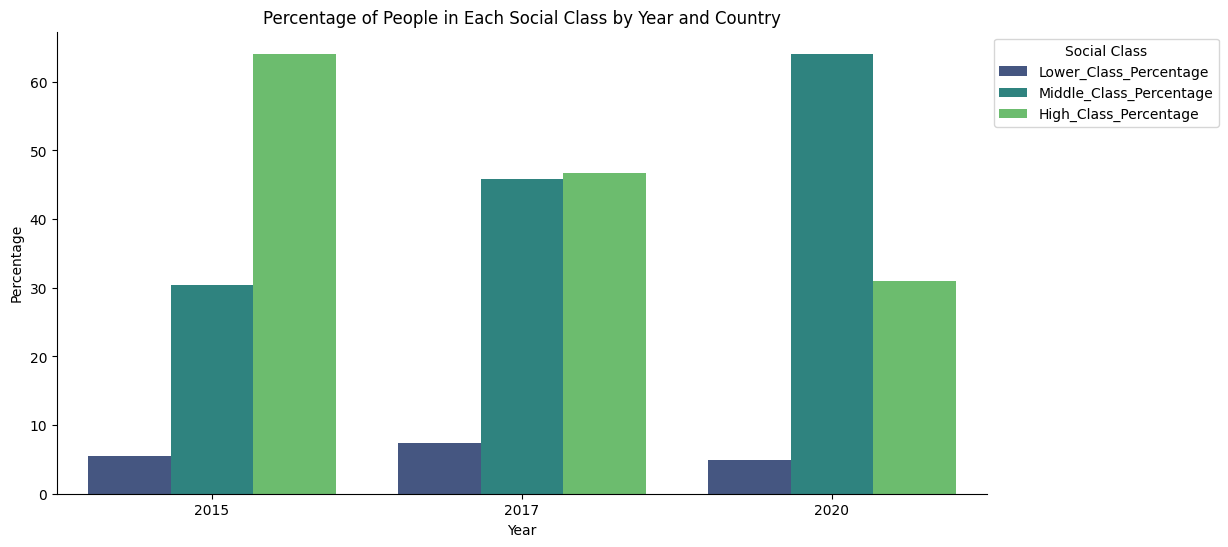

In [16]:
#Total population
df['Total_Population'] = df['Lower_Class'] + df['Middle_Class'] + df['High_Class']
# Percentage of each social class
df['Lower_Class_Percentage'] = df['Lower_Class'] / df['Total_Population'] * 100
df['Middle_Class_Percentage'] = df['Middle_Class'] / df['Total_Population'] * 100
df['High_Class_Percentage'] = df['High_Class'] / df['Total_Population'] * 100
df_melted = df.melt(id_vars=['Country', 'Year'], value_vars=['Lower_Class_Percentage', 'Middle_Class_Percentage', 'High_Class_Percentage'], var_name='Social_Class', value_name='Percentage')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Year', y='Percentage', hue='Social_Class', ci=None, dodge=True, palette='viridis')
plt.title('Percentage of People in Each Social Class by Year and Country')
plt.legend(title='Social Class', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()